In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def leggi_dati_da_file(nome_file):
    x_vals = []
    y_vals = []
    errori_y = []

    try:
        with open(nome_file, 'r') as file:
            for linea in file:
                valori = linea.strip().split()
                if len(valori) != 3:
                    print(f"Riga ignorata (dati non validi): {linea.strip()}")
                    continue

                x, y, errore_y = map(float, valori)
                x_vals.append(x)
                y_vals.append(y)
                errori_y.append(errore_y)

    except FileNotFoundError:
        print(f"Errore: Il file '{nome_file}' non esiste.")
    
    return x_vals, y_vals, errori_y

---

# Esercizio 6.1

Lo scopo dell'esercizio è quello di simulare statisticamente tramite l'algoritmo di Gibbs e l'algoritmo di Metropolis alcune proprietà termodinamiche tipiche di un modello di ising. I dati raccolti di magnetizzazione per particella ad $h = 0.02$, suscettività per particella ad $h = 0.0$, capacità termica per particella ad $h = 0.0$ ed energia interna per particella ad $h = 0.0$ sono poi confrontati con le soluzioni esatte del modello di Ising 1D.

In tutti i risultati riportati le simulazioni riproducono con incertezza relativa molto bassa i risultati ottenuti analiticamente. Nel contesto di questa simulazione i due metodi si rivelano equivalenti ed intercambiabili.

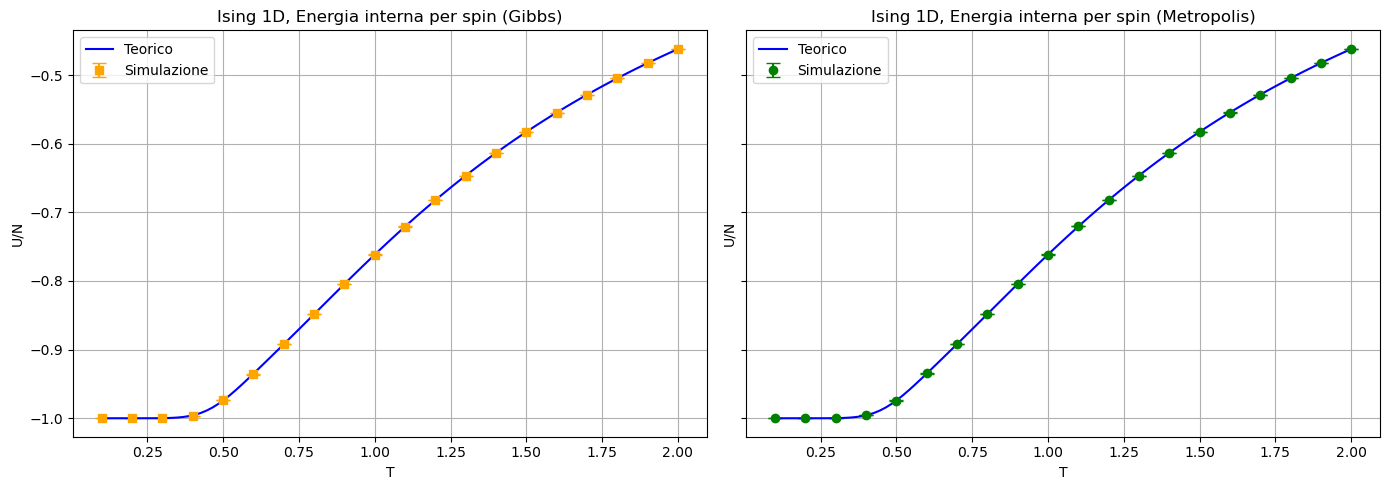

In [10]:
# === Calcolo curva teorica ===
points = 100
T = np.linspace(0.1, 2.0, num=points)
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th ** Ns
ch = 1 / th
e_teorico = -J * (th + ch * thN) / (1 + thN)

# === Lettura dati ===
x1, y1, errore_y1 = leggi_dati_da_file("OUTPUT/energy_vs_temperature_gibbs.dat")
x2, y2, errore_y2 = leggi_dati_da_file("OUTPUT/energy_vs_temperature_metro.dat")

# === Creazione sottografi ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# --- Primo grafico (Gibbs) ---
axes[0].errorbar(x1, y1, yerr=errore_y1, fmt='s', capsize=5, color='orange', ecolor='orange', label='Simulazione')
axes[0].plot(T, e_teorico, label='Teorico', color='blue')
axes[0].set_title('Ising 1D, Energia interna per spin (Gibbs)')
axes[0].set_xlabel('T')
axes[0].set_ylabel('U/N')
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico (Metropolis) ---
axes[1].errorbar(x2, y2, yerr=errore_y2, fmt='o', capsize=5, color='green', ecolor='green', label='Simulazione')
axes[1].plot(T, e_teorico, label='Teorico', color='blue')
axes[1].set_title('Ising 1D, Energia interna per spin (Metropolis)')
axes[1].set_xlabel('T')
axes[1].set_ylabel('U/N')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

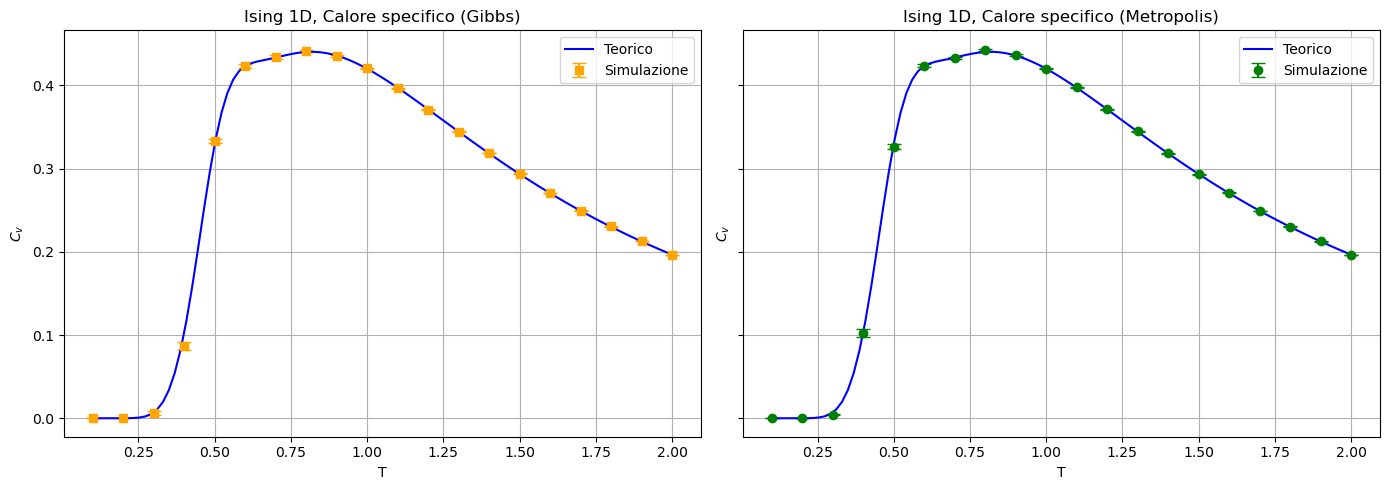

In [8]:
points = 100
T = np.linspace(0.1, 2.0, num=points)
J = 1.0
Ns = 50
beta = 1 / T
th = np.tanh(J / T)
thN = th ** Ns
ch = 1 / th
heat = ((beta * J) ** 2) * (
    ((1 + thN + (Ns - 1) * (th ** 2) + (Ns - 1) * (ch ** 2) * thN) / (1 + thN)) -
    Ns * ((th + ch * thN) / (1 + thN)) ** 2
)

# === Lettura dati ===
x1, y1, errore_y1 = leggi_dati_da_file("OUTPUT/specific_heat_vs_temperature_gibbs.dat")
x2, y2, errore_y2 = leggi_dati_da_file("OUTPUT/specific_heat_vs_temperature_metro.dat")

# === Creazione sottografi ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# --- Primo grafico ---
axes[0].errorbar(x1, y1, yerr=errore_y1, fmt='s', capsize=5, color='orange', ecolor='orange', label='Simulazione')
axes[0].plot(T, heat, label='Teorico', color='blue')
axes[0].set_title('Ising 1D, Calore specifico (Gibbs)')
axes[0].set_xlabel('T')
axes[0].set_ylabel('$C_v$')
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico ---
axes[1].errorbar(x2, y2, yerr=errore_y2, fmt='o', capsize=5, color='green', ecolor='green', label='Simulazione')
axes[1].plot(T, heat, label='Teorico', color='blue')
axes[1].set_title('Ising 1D, Calore specifico (Metropolis)')
axes[1].set_xlabel('T')
axes[1].set_ylabel('$C_v$')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_6410/3147275747.py:22: SyntaxWarning: invalid escape sequence '\c'
  axes[1].set_ylabel('$\chi$/N')


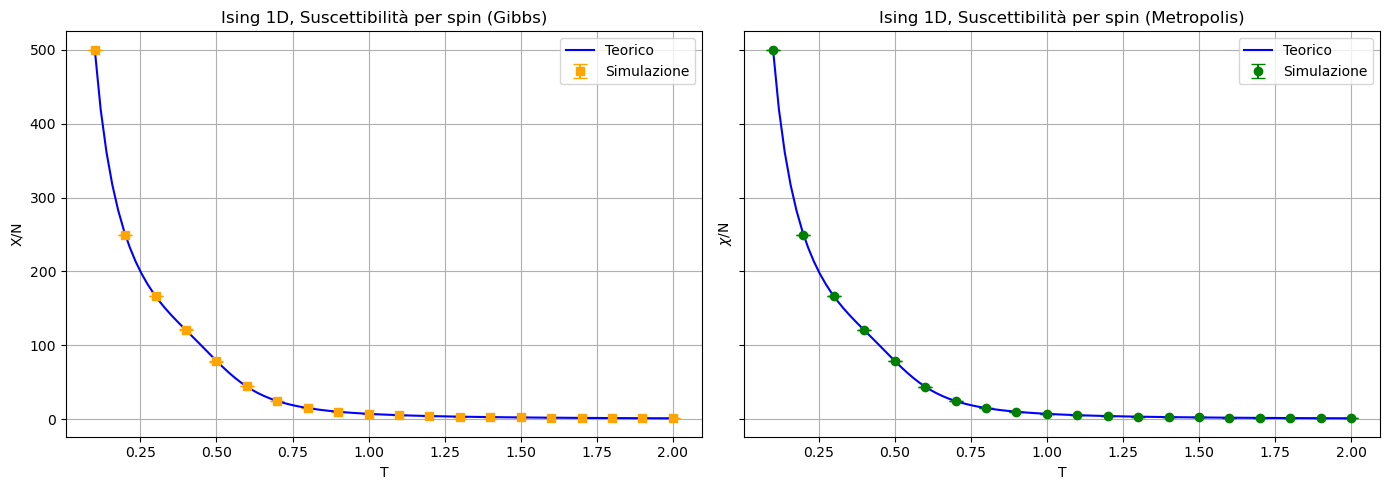

In [7]:
# === Lettura dati ===
x1, y1, errore_y1 = leggi_dati_da_file("OUTPUT/susceptibility_vs_temperature_gibbs.dat")
x2, y2, errore_y2 = leggi_dati_da_file("OUTPUT/susceptibility_vs_temperature_metro.dat")

# === Creazione sottografi ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
# --- Primo grafico ---
axes[0].errorbar(x1, y1, yerr=errore_y1, fmt='s', capsize=5, color='orange', ecolor='orange', label='Simulazione')
axes[0].plot(T, X, label='Teorico', color='blue')
axes[0].set_title('Ising 1D, Suscettibilità per spin (Gibbs)')
axes[0].set_xlabel('T')
axes[0].set_ylabel('$\chi$/N')
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico ---
axes[1].errorbar(x2, y2, yerr=errore_y2, fmt='o', capsize=5, color='green', ecolor='green', label='Simulazione')
axes[1].plot(T, X, label='Teorico', color='blue')
axes[1].set_title('Ising 1D, Suscettibilità per spin (Metropolis)')
axes[1].set_xlabel('T')
axes[1].set_ylabel('$\chi$/N')
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

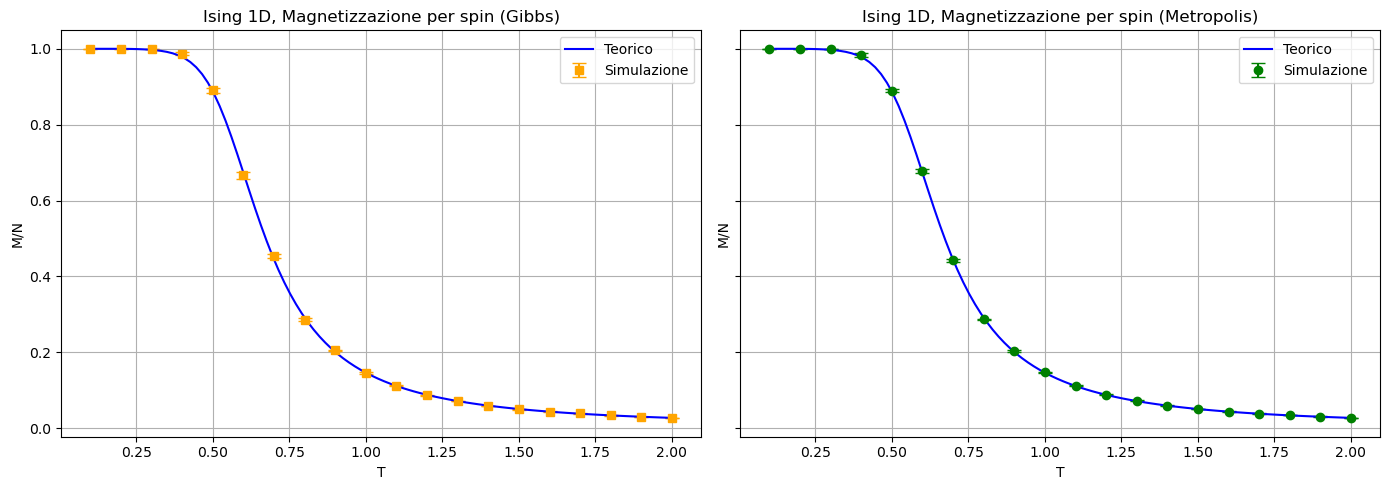

In [12]:
# === Lettura dati ===
x1, y1, errore_y1 = leggi_dati_da_file("OUTPUT/magnetization_vs_temperature_gibbs.dat")
x2, y2, errore_y2 = leggi_dati_da_file("OUTPUT/magnetization_vs_temperature_metro.dat")

# === Creazione sottografi ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
# --- Primo grafico ---
axes[0].errorbar(x1, y1, yerr=errore_y1, fmt='s', capsize=5, color='orange', ecolor='orange', label='Simulazione')
axes[0].plot(T, M, label='Teorico', color='blue')
axes[0].set_title('Ising 1D, Magnetizzazione per spin (Gibbs)')
axes[0].set_xlabel('T')
axes[0].set_ylabel('M/N')
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico ---
axes[1].errorbar(x2, y2, yerr=errore_y2, fmt='o', capsize=5, color='green', ecolor='green', label='Simulazione')
axes[1].plot(T, M, label='Teorico', color='blue')
axes[1].set_title('Ising 1D, Magnetizzazione per spin (Metropolis)')
axes[1].set_xlabel('T')
axes[1].set_ylabel('M/N')
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()